<a href="http://datamics.com/de/courses/"><img src=../DATA/bg_datamics_top.png></a>

<em text-align:center>Copyright Datamics</em>

# Prüfung Objektdetektion Projekt Übung - Lösung

## Verschleiern von russischen Nummernschildern

Willkommen zu deinem Objekterkennungsprojekt! Dein Ziel ist es, Haar-Kaskaden anzuwenden, um die in einem Bild erkannten Nummerschilder zu verschleiern!

Russen sind dafür bekannt, einige der unterhaltsamsten Dashcam-Videoaufzeichnungen des Internets bereit zu stellen (Ich  möchte dich dazu anregen, auf Google nach "Russian Dashcam" zu suchen). Unglücklicherweise enthalten die meisten Aufzeichnungen Nummernschilder, vielleicht können wir aushelfen und ein Nummernschilderverschleierungstool erstellen?

OpenCV kommt mit einer .xml-Datei zur Erkennung russischer Nummernschilder, die wir wie die Gesichtsdetektionsdateien verwenden können. (Unglücklicherweise kommt es nicht mit Detektoren für die Nummernschilder anderer Länder!)


----


#### 3 Herangehensweisen für dieses Projekt:
* Leg' einfach los! Verwende das Bild car_plate.jpg im Verzeichnis DATA und erzeuge eine Funktion, die das Bild des Nummernschildes verschleiert. Durchsuche das Verzeichnis mit Haar-Kaskaden und finde die korrekte, vortrainierte .xml-Datei.
* Verwende dieses Notebook! Hier bieten wir einen Leitfaden mit den wichtigsten Schritten, die du vornehmen solltest, um das Projekt zu vervollständigen.
* Springe zu dem Lösungs-Notebook und Video und betrachte dieses ganze Projekt als eine freiwillige Coding-Übung mit uns.

## Projektleitfaden

Vervollständige die untenstehenden Aufgaben um das Projekt fertig zu stellen!

**AUFGABE: Importiere die üblichen Bibliotheken, von denen du denkst, dass du sie brauchst.**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**AUFGABE: Öffne die Datei car_plate.jpg aus dem Verzeichnis DATA.**

In [2]:
img = cv2.imread('../DATA/car_plate.jpg')

**AUFGABE: Erzeuge eine Funktion, die das Bild vergrößert anzeigt und korrigiere das Farbschema für Matplotlib.**

In [3]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

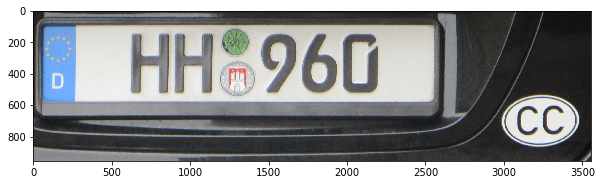

In [4]:
display(img)

**AUFGABE: Lade die Datei haarcascade_russian_plate_number.xml.**

In [5]:
plate_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

**AUFGABE: Erzeuge eine Funktion, die ein Eingabebild annimmt und, wenn vorhanden, ein Rechteck um das detektierte Nummernschild zeichnet. Behalte im Hinterkopf, dass wir nun lediglich ein Rechteck darum zeichnen, später passen wir diese Funktion zum Verschleiern an. Wenn du möchtest, spiele mit den Parametern scaleFactor und minNeighbor, um gute Ergebnisse zu erhalten.**

In [6]:
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4) 
        
    return plate_img
    

In [ ]:
result = detect_plate(img)

In [ ]:
display(result)

**LETZTE AUFGABE: Editiere die Funktion, so dass sie das detektierte Nummernschild verschleiert, anstatt nur ein Rechteck darum zu zeichnen. Führe hierzu nach belieben die folgenden Schritte aus:**

1. Am schwersten ist es, die (x,y,w,h)-Information in die Dimension zu konvertieren, die du brauchst, um die ROI zu finden (dies haben wir behandelt in der Lektion 01-Verschmelzen-und-Einfügen-von-Bildern. Es ist lediglich [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), du must nur die Information über die rechte, obere Ecke des Rechtecks in indizierbare Positionswerte umwandeln.)
2. Nachdem die ROI mit den (x,y,w,h)-Werten ermittelt wurde, willst du die ROI verschleiern. Du kannst cv2.medianBlur hierzu verwenden.
3. Nachem du jetzt eine verschleierte Version der ROI (das Nummernschild) hast, willst du dieses verschleierte Bild auf dem Originalbild an der Ursprungsstelle einfügen. Verwende hierzu einfach Numpy-Indizierung und Slicing und weise diesem Bereich im Originalbild die verschleierte ROI zu.

In [ ]:
def detect_and_blur_plate(img):
    
    # Schaue das Lösungsvideo für eine zeilenweise Erklärung!
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [ ]:
result = detect_and_blur_plate(img)

In [ ]:
display(result)

# Gut gemacht!